In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:/[DesireCourse.Net] Udemy - Complete Tensorflow 2 and Keras Deep Learning Bootcamp/1. Course Overview, Installs, and Setup/2.1 FINAL_TF2_FILES.zip/TF_2_Notebooks_and_Data/DATA/RSCCASN.csv",
                 parse_dates=True,index_col="DATE")

In [5]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.columns = ["Sales"]

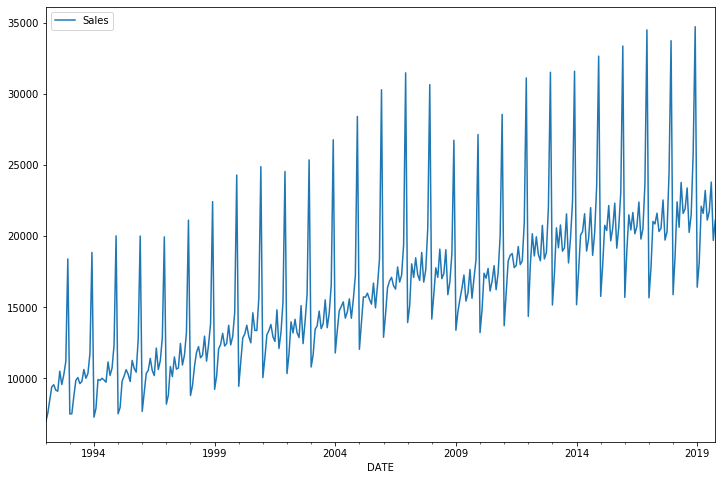

In [8]:
df.plot(figsize=(12,8))

In [9]:
len(df)

334

In [10]:
len(df) - 18

316

In [11]:
test_size = 18
test_ind = len(df) - test_size

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind: ]

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [14]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler.transform(train)

In [19]:
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
len(test)

18

In [22]:
length = 12

In [23]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [24]:
X,y = generator[0]

In [25]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [26]:
y

array([[0.02047633]])

In [27]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, LSTM

In [30]:
n_features = 1

In [46]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [50]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [51]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
304/304 [==============================] - 25s 81ms/step - loss: 0.0228 - val_loss: 0.0026
Epoch 2/20
304/304 [==============================] - 21s 70ms/step - loss: 0.0173 - val_loss: 0.0157
Epoch 3/20
304/304 [==============================] - 19s 62ms/step - loss: 0.0106 - val_loss: 0.0075


In [52]:
losses = pd.DataFrame(model.history.history)

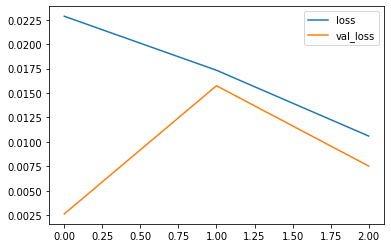

In [53]:
losses.plot()

In [54]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [55]:
true_predictions = scaler.inverse_transform(test_predictions)

In [56]:
test['Predictions'] = true_predictions

c:\users\chris\anaconda3\envs\mytfenv2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22959.582129
2018-06-01,21589,22212.511848
2018-07-01,21919,22533.746569
2018-08-01,23381,24036.317520
2018-09-01,20260,22210.393990
2018-10-01,21473,22882.946866
2018-11-01,25831,27259.414913
2018-12-01,34706,34492.477651
2019-01-01,16410,19329.823178


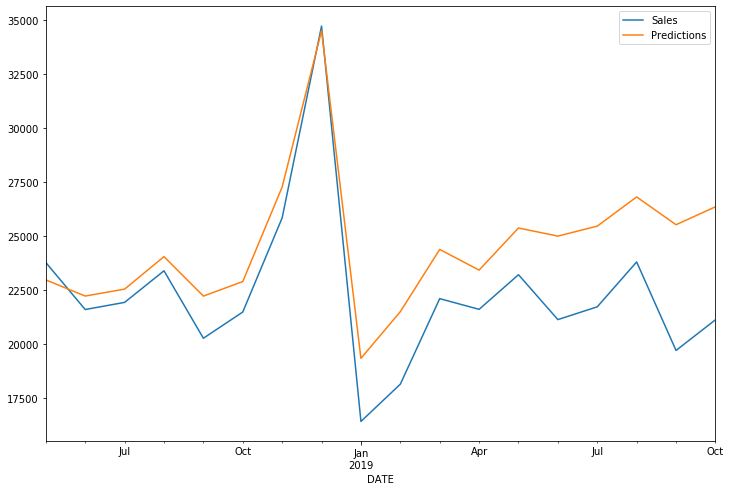

In [58]:
test.plot(figsize=(12,8))

In [59]:
full_scaler = MinMaxScaler()

In [61]:
scaled_full_data = full_scaler.fit_transform(df)

In [62]:
length = 12

In [63]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [64]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

model.fit_generator(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 19s 60ms/step - loss: 0.0249
Epoch 2/8
322/322 [==============================] - 21s 66ms/step - loss: 0.0163
Epoch 3/8
322/322 [==============================] - 21s 64ms/step - loss: 0.0064
Epoch 4/8
322/322 [==============================] - 27s 85ms/step - loss: 0.0025
Epoch 5/8
322/322 [==============================] - 20s 62ms/step - loss: 0.0022
Epoch 6/8
322/322 [==============================] - 23s 70ms/step - loss: 0.0014
Epoch 7/8
322/322 [==============================] - 22s 69ms/step - loss: 0.0013
Epoch 8/8
322/322 [==============================] - 21s 66ms/step - loss: 0.0019


In [77]:
forecast = []

periods=12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [78]:
forecast = scaler.inverse_transform(forecast)

In [79]:
forecast

array([[20884.08135509],
       [19856.34318233],
       [20040.9637537 ],
       [21689.99361038],
       [19400.27889395],
       [19859.12923265],
       [23340.09388828],
       [33320.80312157],
       [16192.1501596 ],
       [18263.69185305],
       [21459.39335823],
       [19965.06645656]])

In [80]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq="MS")

In [81]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [82]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=["Forecast"])

In [83]:
forecast_df

,Forecast
2019-11-01,20884.081355
2019-12-01,19856.343182
2020-01-01,20040.963754
2020-02-01,21689.993610
2020-03-01,19400.278894
2020-04-01,19859.129233
2020-05-01,23340.093888
2020-06-01,33320.803122
2020-07-01,16192.150160
2020-08-01,18263.691853


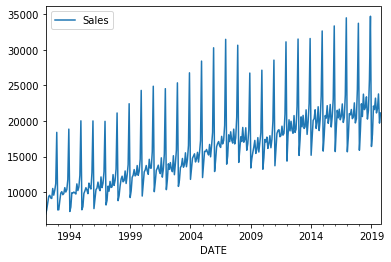

In [84]:
df.plot()

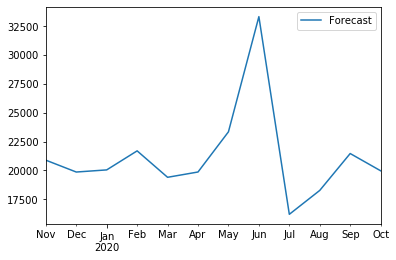

In [85]:
forecast_df.plot()

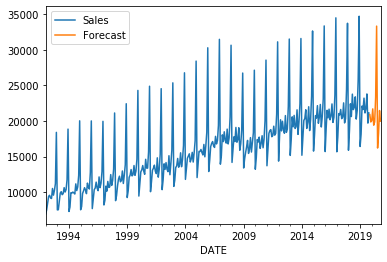

In [86]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576, 611)

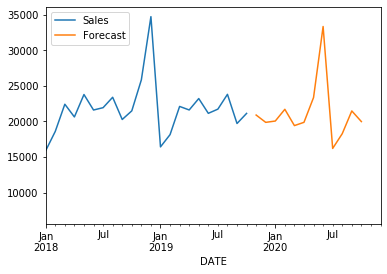

In [87]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim("2018-01-01","2020-12-01")